In [1]:
import pandas as pd
import seaborn as sb
import joblib
import matplotlib.pyplot as plt

In [2]:
data = joblib.load("CBGcoords.data.jl")

In [3]:
# I need to dedup by key/anno_key - I don't care about intersection (for now)
data.reset_index(inplace=True)
data.sort_values(["index", "anno_key", "merge"], inplace=True)
data.drop_duplicates(subset=["index", "anno_key", "merge"], inplace=True)
data['merge'] = data['merge'].where(data['merge'] != 'Exact', "BCFtools")
data

,index,intersection,anno_key,svtype,AF,merge
0,chr10:101366878-101366879.TATATATATTTATATACAAA...,start_bnd,133,INS,0.013889,Exact
47258,chr10:101366878-101366879.TATATATATTTATATACAAA...,start_bnd,133,INS,0.208333,Naive
24434,chr10:101366878-101366879.TATATATATTTATATACAAA...,start_bnd,133,INS,0.013889,Truvari
54897,chr10:101366878-101366947.ATATATAAATATATATTTAT...,start_bnd,133,INS,0.208333,SURVIVOR
3,chr10:101366888-101366889.TATATACAAATATATATATA...,start_bnd,133,INS,0.013889,Exact
...,...,...,...,...,...,...
24431,chr9:69212970-69212971.TATGTATTAAGGTATAATACATA...,start_bnd,105,INS,0.416667,Exact
47255,chr9:69212970-69212971.TATGTATTAAGGTATAATACATA...,start_bnd,105,INS,0.416667,Jasmine
54894,chr9:69212970-69212971.TATGTATTAAGGTATAATACATA...,start_bnd,105,INS,0.416667,Naive
37774,chr9:69212970-69212971.TATGTATTAAGGTATAATACATA...,start_bnd,105,INS,0.416667,Truvari


In [6]:
view = data.groupby(["anno_key", "merge"]).size().reset_index()
view.columns = ["gene", "merge", "count"]

In [7]:
view.groupby(['merge'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
merge,,,,,,,,
BCFtools,203.0,40.133005,85.365707,1.0,3.0,12.0,37.5,529.0
Jasmine,203.0,15.576355,33.247167,1.0,2.0,5.0,13.0,247.0
Naive,203.0,12.551724,25.891453,1.0,2.0,4.0,11.5,185.0
SURVIVOR,203.0,5.901478,9.595283,1.0,2.0,3.0,6.0,69.0
Truvari,203.0,21.921182,44.146512,1.0,2.0,7.0,20.0,273.0


[Text(0.5, 1.0, 'SV Count over 273 CMRGenes'),
 Text(0.5, 0, 'Merge'),
 Text(0, 0.5, 'Count')]

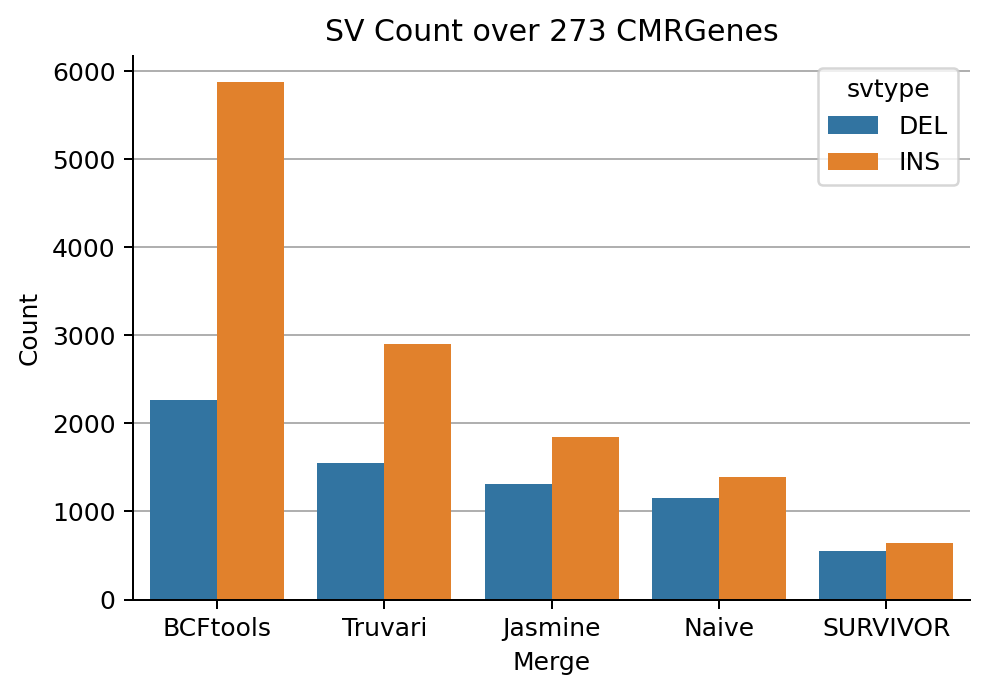

In [11]:
plt.figure(dpi=180)
p = sb.countplot(data=data, x="merge", 
               hue="svtype", 
               order=["BCFtools", "Truvari", "Jasmine", "Naive", "SURVIVOR"],
               hue_order=["DEL", "INS"])
#sb.move_legend(p, "upper left", bbox_to_anchor=(1, 1))
plt.grid(which='major', axis='y')
p.set_axisbelow(True)
sb.despine()
p.set(title="SV Count over 273 CMRGenes", xlabel="Merge", ylabel="Count")

[Text(0.5, 1.0, 'Mean AF over 273 CMRGenes'),
 Text(0.5, 0, 'Merge'),
 Text(0, 0.5, 'AF'),
 (0.0, 0.3)]

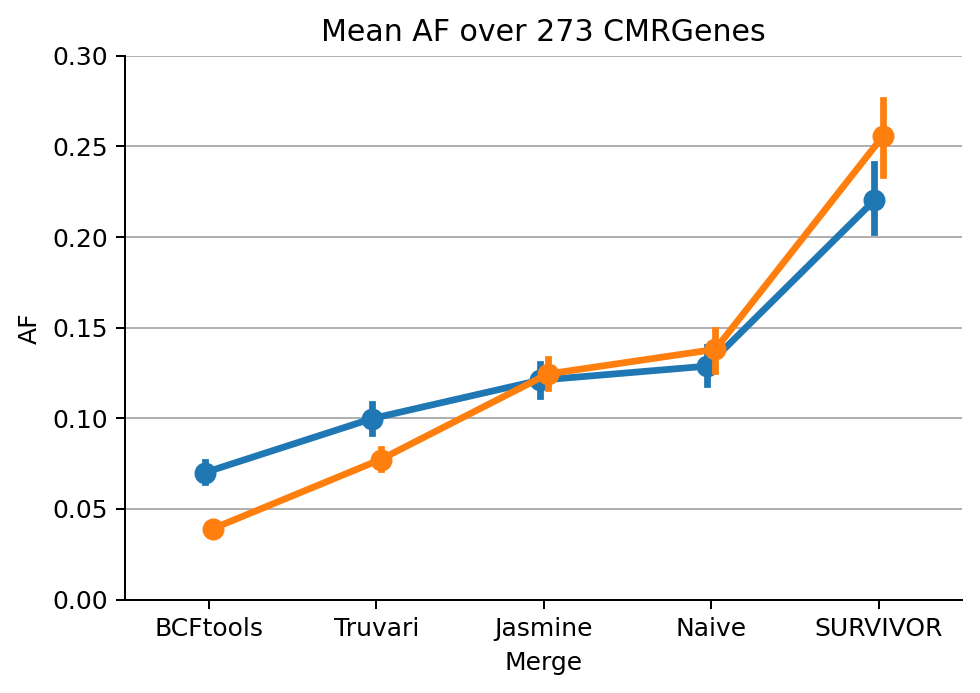

In [10]:
import numpy
plt.figure(dpi=180)
p = sb.pointplot(data=data, x="merge", 
#                 estimator=numpy.mean,
               y="AF", 
               hue="svtype", 
               order=["BCFtools", "Truvari", "Jasmine", "Naive", "SURVIVOR"],
               hue_order=["DEL", "INS"], dodge=True, ci=95, n_boot=1000,seed=923)
#sb.move_legend(p, "upper left", bbox_to_anchor=(1, 1))
plt.legend().remove()
plt.grid(which='major', axis='y')
p.set_axisbelow(True)
sb.despine()
p.set(title="Mean AF over 273 CMRGenes", xlabel="Merge", ylabel="AF", ylim=(0,0.30))

[Text(0.5, 1.0, 'SV AF distribution over 273 CMRGenes'),
 Text(0.5, 0, 'Merge'),
 Text(0, 0.5, 'AF')]

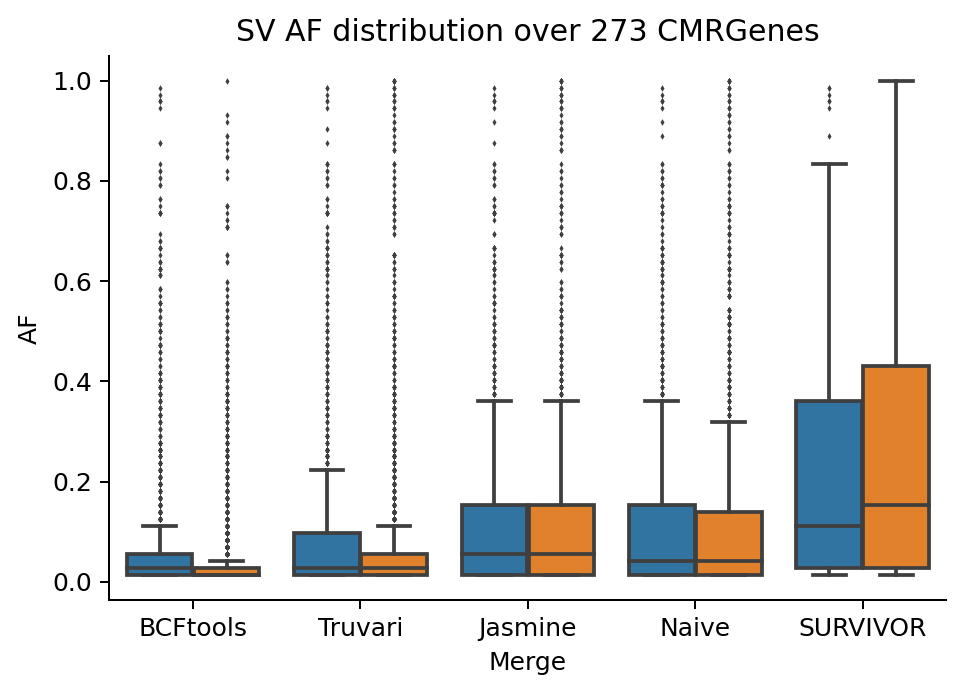

In [12]:
plt.figure(dpi=180)
p = sb.boxplot(data=data, x="merge", 
               y="AF", 
               hue="svtype", 
               order=["BCFtools", "Truvari", "Jasmine", "Naive", "SURVIVOR"],
               hue_order=["DEL", "INS"], fliersize=.5)
#sb.move_legend(p, "upper left", bbox_to_anchor=(1, 1))
plt.legend().remove()
sb.despine()
p.set(title="SV AF distribution over 273 CMRGenes", xlabel="Merge", ylabel="AF")